In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
from thefuzz import fuzz, process

import sys 
import os
sys.path.append(os.path.abspath("../src/"))
import metros

In [2]:
path = '../data/_data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [4]:
# Переименовываем колонки и убираем не нужные основываясь на EDA

In [5]:
df.set_index('ID  объявления', inplace=True)

In [6]:
df=df.drop(columns=["Unnamed: 0",'Телефоны','Описание','Площадь комнат, м2','Окна','Название ЖК','Серия дома',
                 'Мусоропровод','Ссылка на объявление', 'Тип'])
df=df.rename(columns={'ID  объявления':"ID",'Количество комнат':"numbers_rooms",'Метро':"metro",'Адрес':"address",'Площадь, м2':"area_square",
                     "Дом":"building","Парковка":"parking","Цена":"price","Ремонт":"repair","Балкон":"balcony","Санузел":"bathroom","Можно с детьми/животными":"with_child_and_dogs",
                      "Дополнительно":"comfort","Лифт":"elevator", 'Высота потолков, м': 'ceilings'})

In [7]:
df.head()

,numbers_rooms,metro,address,area_square,building,parking,price,repair,balcony,bathroom,with_child_and_dogs,comfort,ceilings,elevator
ID объявления,,,,,,,,,,,,,,
271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)"
271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)"
271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1)
272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,NaN,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1)
273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,NaN,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)"


In [8]:
# Делим колонку адрес на колонку Город и Адрес

In [9]:
df['city'] = df.loc[:,'address'].str.split(',').str[0]
df['address'] = df.loc[:,'address'].str.split(',').str[1] + df.loc[:,'address'].str.split(',').str[2]

In [10]:
# Удаляем все не московские объявления

In [11]:
df = df.loc[df.loc[:,'city'] == 'Москва']

In [12]:
# Удаляем колонку город, теперь она не нужна

In [13]:
df.drop(columns=['city'], inplace=True)

In [14]:
# Заполняем пустые значения дети/животные, парковки, балконов, лифтов значением НЕТ (посмотреть на графиках как будет)

In [15]:
df['parking'] = df['parking'].fillna('нет парковки').astype('category')

In [16]:
df['balcony'] = df['balcony'].fillna('нет балкона').astype('category')

In [17]:
df['elevator'] = df['elevator'].fillna('нет лифта').astype('category')

In [18]:
df['with_child_and_dogs'] = df['with_child_and_dogs'].fillna('без детей и животных').astype('category')

In [19]:
# Сегментизируем колонку комфорт

In [20]:
def categorize_items(comf):
    if pd.isna(comf):
        return pd.NA
    items = comf.split(', ')
    count = len(items)

    if count <= 3:
        return 'простой'
    elif 4 <= count <= 6:
        return 'стандарт'
    elif 7 <= count <= 9:
        return 'комфорт'
    else:
        return 'премиум'

df['comfort_cat'] = df['comfort'].apply(categorize_items).astype('category')

In [21]:
# Удаляем старую колонку комфорт

In [22]:
df.drop(columns=['comfort'], inplace=True)

In [23]:
# С помощью алгоритма сравнения строк Levenshtein заполняем пустые значения метро
# Находим наиболее близкие строки адресов с заполненым метро и берем метро оттуда

In [24]:
# Подготовка переменнх
strip = np.vectorize(str.strip)
addresses = strip(df.loc[df.loc[:,'metro'].notna()]['address'].unique())
temp_df = df.loc[df.loc[:,'metro'].notna(), ['address', 'metro']]


In [25]:
def fill_metro(row):
    # применяем алгоритм, что бы найти максимально близкую строка адреса с метро
    address = max(addresses, key=lambda x: fuzz.partial_ratio(row['address'], x))
    return(temp_df[temp_df.loc[:,'address'].str.contains(address)]['metro'].mode()[0]) #возвращаем mode метро данного адреса

df['metro'] = pd.concat([
    df[df.loc[:,'metro'].isna()].apply(fill_metro, axis=1),
    df.loc[df.loc[:,'metro'].notna(), 'metro']
])

In [26]:
# Будем отслеживать местоположение теперь по метро, избавимся от колонки адреси

In [27]:
df.drop(columns=['address'], inplace=True)

In [28]:
# Обрабатываем колонку площади и приводим к числовому типу

In [29]:
df['area_square'] = pd.to_numeric(df['area_square'].map(lambda x: x.split('/')[0]))

In [30]:
# Делим колонку метро на: название метро, время пути, транспорт

In [31]:
df[["metro_station", "time_min", "method"]] = df["metro"].str.extract(r'м\.\s*([^(]+)\s*\((\d+|None)\s*мин\s+(пешком|на машине)\)')
df["time_min"]=pd.to_numeric(df["time_min"], errors='coerce')
df['time_min'] = df["time_min"].fillna(0)

mean = df['time_min'].mean()
station_means = df.groupby('metro_station')['time_min'].mean().to_dict()

def replace_zero_with_mean(row):
    if row['time_min'] == 0:
        mean_time = station_means.get(row['metro_station'], mean)
        return mean_time if not pd.isna(mean_time) else 0
    return row['time_min']
df['time_min'] = df.apply(replace_zero_with_mean, axis=1)

In [32]:
# метро лужники всего 1 значение, выкидываем его
df.drop(df.loc[df.loc[:,'metro_station'].str.contains('Лужники')].index, inplace=True)

In [33]:
# Избавляемся от колонки metro, эта информация есть в колонке metro_station

In [34]:
df.drop(columns=['metro'], inplace=True)

In [35]:
# Обрабатываем колонку цены и приводим к числовому типу

In [36]:
def calculate_total(price_str):
    if not isinstance(price_str, str):
        return 0  

    total_cost = 0

    rent_match = re.search(r'([\d.,]+)\sруб./ За месяц', price_str)
    if rent_match:
        rent = float(rent_match.group(1).replace(',', '.'))  
        total_cost += rent

    utility_match = re.search(r'Сумма коммунальных платежей - ([\d.,]+)\sруб.', price_str)
    if utility_match:
        utility = float(utility_match.group(1).replace(',', '.'))  
        total_cost += utility

    dollar_match = re.search(r'([\d.,]+)\s\$', price_str)
    if dollar_match:
        dollars = float(dollar_match.group(1).replace(',', '.')) 
        total_cost += dollars * 85  

    euro_match = re.search(r'([\d.,]+)\s€', price_str)
    if euro_match:
        euros = float(euro_match.group(1).replace(',', '.'))  
        total_cost += euros * 95  

    return int(round(total_cost))

df['price'] = df.loc[:,'price'].apply(calculate_total)

In [37]:
# Заполняем пропущенные значения в колонке высота потолков, значениями из топ 20 по частоте встречи, в нужном соотношении

In [38]:
totals = df['ceilings'].value_counts().head(20).sum()
missings = df['ceilings'].isna().sum()
for val, count in zip((df['ceilings'].value_counts().head(20) / totals * missings).index, round(df['ceilings'].value_counts().head(20) / totals * missings).to_numpy()):
    df['ceilings'] = df['ceilings'].fillna(val, limit=int(count))

In [39]:
# Добавляем новую колонку административный округ

In [40]:
def set_district(metro):
    metro = metro.strip()
    district = None
    if metro in metros.VAO:
        district = 'VAO'
    elif metro in metros.ZAO:
        district = 'ZAO'
    elif metro in metros.NAO:
        district = 'NAO'
    elif metro in metros.SAO:
        district = 'SAO'
    elif metro in metros.SVAO:
        district = 'SVAO'
    elif metro in metros.SZAO:
        district = 'SZAO'
    elif metro in metros.CAO:
        district = 'CAO'
    elif metro in metros.UVAO:
        district = 'UVAO'
    elif metro in metros.UZAO:
        district = 'UZAO'
    elif metro in metros.UAO:
        district = 'UAO'
    elif metro in metros.RAYONI:
        district = 'RAYONI'

    return district
        

df['district'] = df['metro_station'].map(set_district)
df['district'] = df['district'].astype('category')

In [41]:
# Колонка метро нам больше не нужна, удаляем ее

In [42]:
df.drop(columns=['metro_station'], inplace=True)

In [43]:
# Обрабатываем колонку с количеством комнат, заполняем пробелы и приводим ее к цифровой

In [44]:
def numbers(num):
    if pd.isna(num):
        return np.nan
    if len(num)>2:
        word=num.split(",")
        numb=word[0].strip()
    else:
        numb=str(num).strip()
    return numb

df["numbers_rooms"]=df["numbers_rooms"].apply(numbers)

In [45]:
totals = df['numbers_rooms'].value_counts().head(6).sum()
missings = df['numbers_rooms'].isna().sum()
for val, count in zip((df['numbers_rooms'].value_counts().head(6) / totals * missings).index, round(df['numbers_rooms'].value_counts().head(6) / totals * missings).to_numpy()):
    df['numbers_rooms'] = df['numbers_rooms'].fillna(val, limit=int(count))

In [46]:
df.drop(df.loc[df['numbers_rooms'].isna()].index, inplace=True) #УБираем 1 NaN значение комнат, погрешность алгоритма
df['numbers_rooms'] = pd.to_numeric(df['numbers_rooms'])

In [47]:
# Объединяем колонки time_min и method в одну - пешая доступность

In [48]:
def walking_dist(row):
    time = row['time_min']
    time = time * 3 if row['method'] == 'на машине' else time

    return time <= 11 #подходит лучше всего

df['walking_dist'] = df.loc[:, ['method', 'time_min']].apply(walking_dist, axis=1)

In [49]:
df['walking_dist'].sum()

np.int64(11976)

In [50]:
# колонки time_min и  method больше не нужны, убираем их

In [51]:
df.drop(columns=['time_min', 'method'], inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 271271157 to 274672243
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   numbers_rooms        19735 non-null  int64   
 1   area_square          19735 non-null  float64 
 2   building             19735 non-null  object  
 3   parking              19735 non-null  category
 4   price                19735 non-null  int64   
 5   repair               17272 non-null  object  
 6   balcony              19735 non-null  category
 7   bathroom             17694 non-null  object  
 8   with_child_and_dogs  19735 non-null  category
 9   ceilings             19735 non-null  float64 
 10  elevator             19735 non-null  category
 11  comfort_cat          19463 non-null  category
 12  district             19735 non-null  category
 13  walking_dist         19735 non-null  bool    
dtypes: bool(1), category(6), float64(2), int64(2), object(3)
memory

In [53]:
df.head()

,numbers_rooms,area_square,building,parking,price,repair,balcony,bathroom,with_child_and_dogs,ceilings,elevator,comfort_cat,district,walking_dist
ID объявления,,,,,,,,,,,,,,
271271157,4,200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,нет балкона,NaN,"Можно с детьми, Можно с животными",3.0,"Пасс (4), Груз (1)",премиум,CAO,True
271634126,4,198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,нет балкона,"Совмещенный (2), Раздельный (1)",Можно с детьми,3.5,"Пасс (1), Груз (1)",премиум,CAO,True
271173086,4,200.0,5/16,подземная,500000,Евроремонт,нет балкона,Совмещенный (3),Можно с детьми,3.2,Пасс (1),премиум,CAO,True
272197456,4,170.0,5/6,подземная,400000,Евроремонт,нет балкона,Совмещенный (3),Можно с животными,3.2,Пасс (1),премиум,CAO,True
273614615,2,58.0,"12/26, Панельный",нет парковки,225000,Евроремонт,нет балкона,Совмещенный (2),без детей и животных,3.9,"Пасс (1), Груз (1)",комфорт,CAO,True


<Axes: >

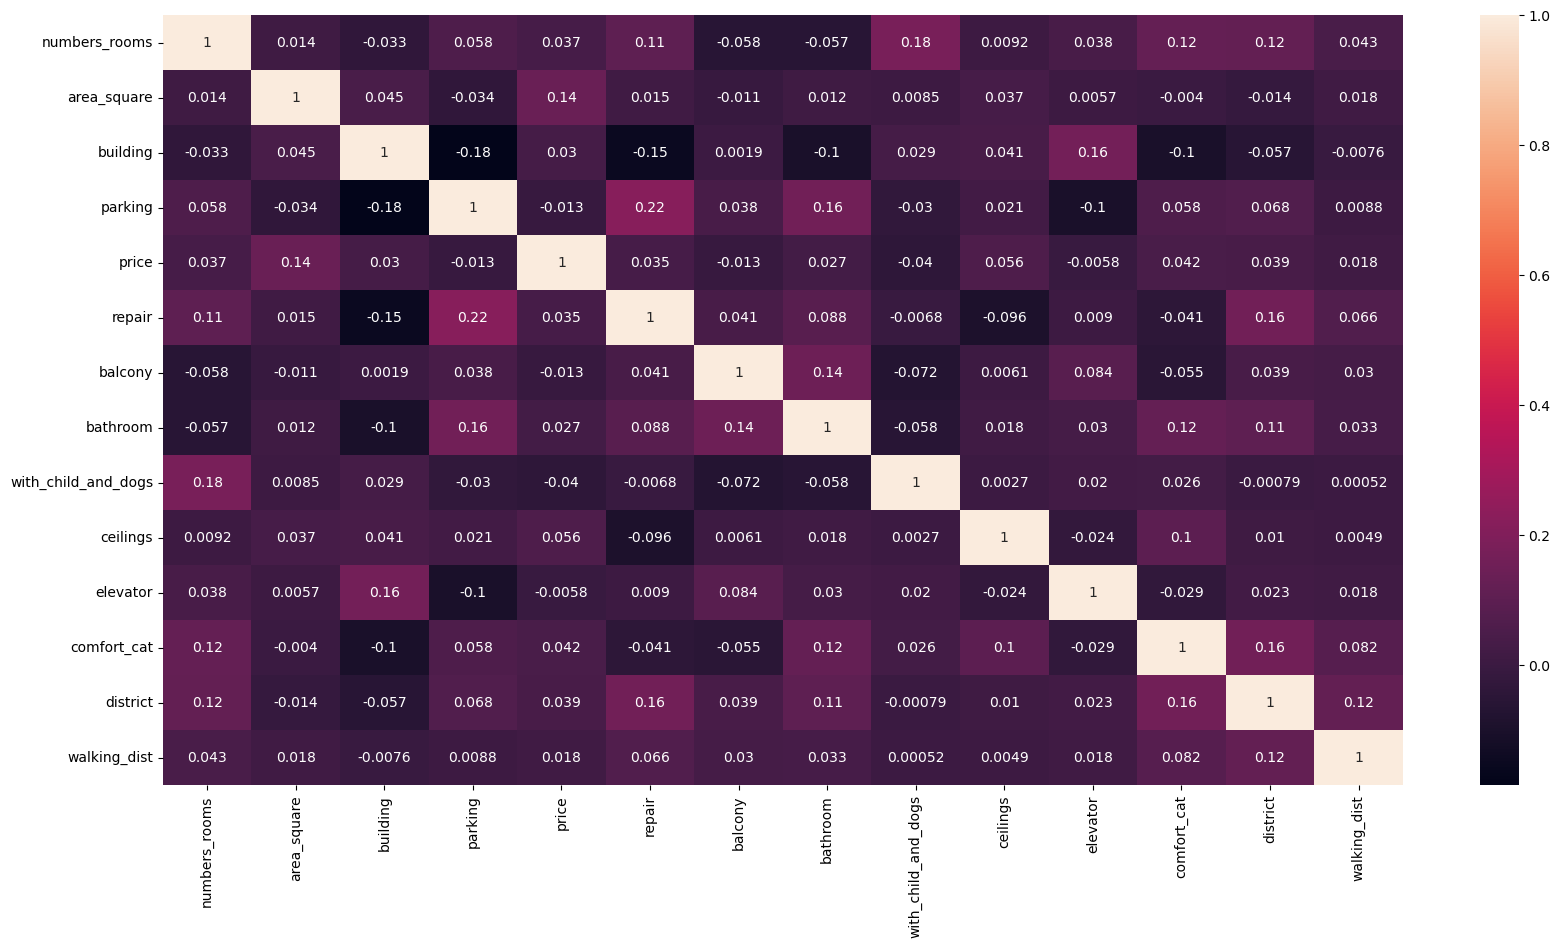

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot=True)

In [55]:
# Что осталось сделать

# Обаботать колонки
## building, bathroom, repair

### building - делим на 2 колонки этаж и тип дома
### bathroom - заполняем NaN в процентном соотношение и категоризируем (NaN)
### repair - что-то сделать (обсудить)


# Заполнить от пропусков
# Привести колонки к нужному типу (категориальный или цифровой)

# Нарисовать графики

# Убрать выбросы